# Decision Trees

# The Data

We will work with the "Palmer Penguins" dataset.
Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

Gorman KB, Williams TD, Fraser WR (2014) Ecological Sexual Dimorphism and Environmental Variability within a Community of Antarctic Penguins (Genus Pygoscelis). PLoS ONE 9(3): e90081. doi:10.1371/journal.pone.0090081

Summary: The data folder contains two CSV files. For intro courses/examples, you probably want to use the first one (penguins_size.csv).

penguins_size.csv: Simplified data from original penguin data sets. Contains variables:

species: penguin species (Chinstrap, Adélie, or Gentoo)
culmen_length_mm: culmen length (mm)
culmen_depth_mm: culmen depth (mm)
flipper_length_mm: flipper length (mm)
body_mass_g: body mass (g)
island: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)
sex: penguin sex
(Not used) penguins_lter.csv: Original combined data for 3 penguin species

Note: The culmen is "the upper ridge of a bird's beak"

Our goal is to create a model that can help predict a species of a penguin based on physical attributes, then we can use that model to help researchers classify penguins in the field, instead of needing an experienced biologist

# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('../DATA/penguins_size.csv')

In [4]:
df.head()

species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen              39.1             18.7              181.0   
1  Adelie  Torgersen              39.5             17.4              186.0   
2  Adelie  Torgersen              40.3             18.0              195.0   
3  Adelie  Torgersen               NaN              NaN                NaN   
4  Adelie  Torgersen              36.7             19.3              193.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
3          NaN     NaN  
4       3450.0  FEMALE

# EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [6]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [7]:
# What percentage are we dropping?
100*(10/344)

2.9069767441860463

In [11]:
df=df.dropna()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.9+ KB


In [13]:
df['sex'].unique()

array(['MALE', 'FEMALE', '.'], dtype=object)

In [14]:
len(df[df['sex']=='.'])

1

In [15]:
df=df[df['sex']!='.']

In [20]:
df['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [21]:
df['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [17]:
df.columns

Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

# Visualization

<Axes: xlabel='culmen_length_mm', ylabel='culmen_depth_mm'>

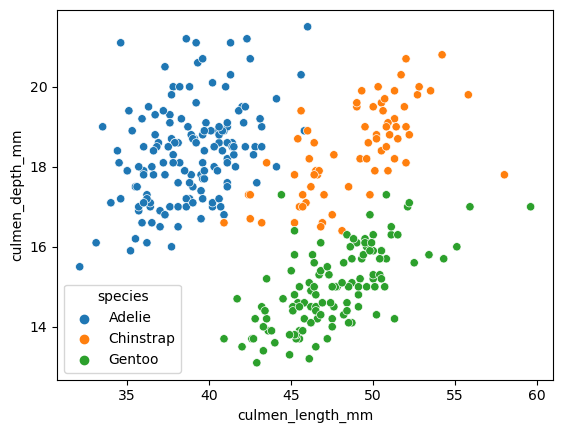

In [18]:
sns.scatterplot(data=df,x='culmen_length_mm',y='culmen_depth_mm',hue='species')

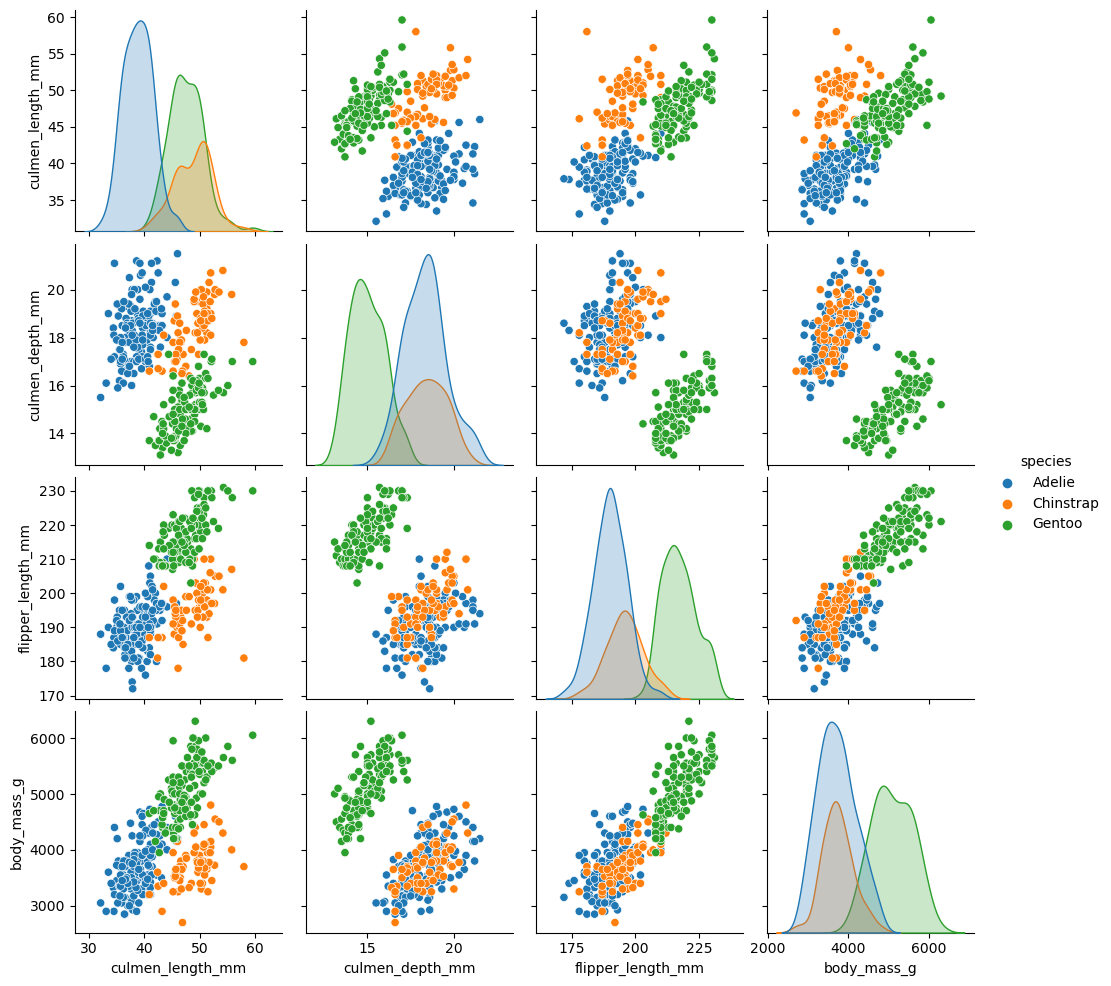

In [19]:
sns.pairplot(df,hue='species')

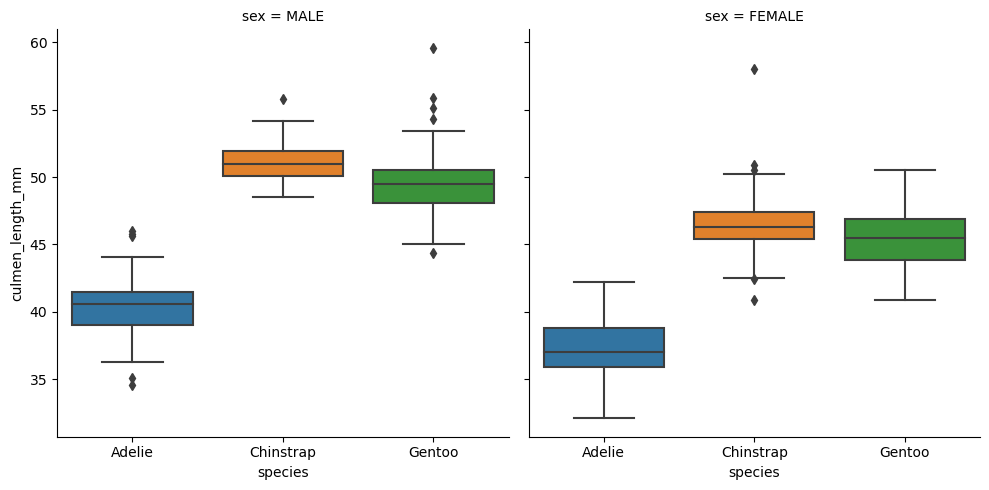

In [22]:
sns.catplot(data=df,x='species', y='culmen_length_mm',kind='box',col='sex')

# Feature Engineering

In [23]:
pd.get_dummies(df)

culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  \
0                39.1             18.7              181.0       3750.0   
1                39.5             17.4              186.0       3800.0   
2                40.3             18.0              195.0       3250.0   
4                36.7             19.3              193.0       3450.0   
5                39.3             20.6              190.0       3650.0   
..                ...              ...                ...          ...   
338              47.2             13.7              214.0       4925.0   
340              46.8             14.3              215.0       4850.0   
341              50.4             15.7              222.0       5750.0   
342              45.2             14.8              212.0       5200.0   
343              49.9             16.1              213.0       5400.0   

     species_Adelie  species_Chinstrap  species_Gentoo  island_Biscoe  \
0                 1                  0               0              0   
1                 1                  0               0              0   
2                 1                  0               0              0   
4                 1                  0               0              0   
5                 1                  0               0              0   
..              ...                ...             ...            ...   
338               0                  0               1              1   
340               0                  0               1              1   
341               0                  0               1              1   
342               0                  0               1              1   
343               0                  0               1              1   

     island_Dream  island_Torgersen  sex_FEMALE  sex_MALE  
0               0                 1           0         1  
1               0                 1           1         0  
2               0                 1           1         0  
4               0                 1           1         0  
5               0                 1           0         1  
..            ...               ...         ...       ...  
338             0                 0           1         0  
340             0                 0           1         0  
341             0                 0           0         1  
342             0                 0           1         0  
343             0                 0           0         1  

[333 rows x 12 columns]

In [25]:
pd.get_dummies(df.drop('species',axis=1),drop_first=True)

culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  \
0                39.1             18.7              181.0       3750.0   
1                39.5             17.4              186.0       3800.0   
2                40.3             18.0              195.0       3250.0   
4                36.7             19.3              193.0       3450.0   
5                39.3             20.6              190.0       3650.0   
..                ...              ...                ...          ...   
338              47.2             13.7              214.0       4925.0   
340              46.8             14.3              215.0       4850.0   
341              50.4             15.7              222.0       5750.0   
342              45.2             14.8              212.0       5200.0   
343              49.9             16.1              213.0       5400.0   

     island_Dream  island_Torgersen  sex_MALE  
0               0                 1         1  
1               0                 1         0  
2               0                 1         0  
4               0                 1         0  
5               0                 1         1  
..            ...               ...       ...  
338             0                 0         0  
340             0                 0         0  
341             0                 0         1  
342             0                 0         0  
343             0                 0         1  

[333 rows x 7 columns]

# Train Test Split and Scaling

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X=pd.get_dummies(df.drop('species',axis=1),drop_first=True)
y=df['species']

In [39]:
 X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=101)

In [43]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

# Decision Tree Classifier

In [44]:
from sklearn.tree import DecisionTreeClassifier

In [45]:
model=DecisionTreeClassifier()

In [46]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

# Performance Evaluation

In [47]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, ConfusionMatrixDisplay

In [48]:
y_pred=model.predict(X_test)

In [49]:
confusion_matrix(y_test,y_pred)

array([[38,  2,  0],
       [ 1, 26,  0],
       [ 1,  0, 32]], dtype=int64)

In [50]:
accuracy_score(y_test,y_pred)

0.96

In [51]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      Adelie       0.95      0.95      0.95        40
   Chinstrap       0.93      0.96      0.95        27
      Gentoo       1.00      0.97      0.98        33

    accuracy                           0.96       100
   macro avg       0.96      0.96      0.96       100
weighted avg       0.96      0.96      0.96       100



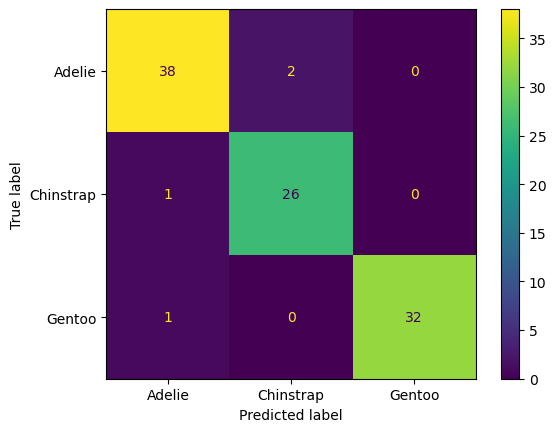

In [53]:
ConfusionMatrixDisplay.from_estimator(model,X_test,y_test)

In [54]:
model.feature_importances_

array([0.33350103, 0.02010577, 0.60147473, 0.        , 0.03806069,
       0.00685778, 0.        ])

In [59]:
pd.DataFrame(data=model.feature_importances_,index=X.columns,columns=['Feature Importance'])

Feature Importance
culmen_length_mm             0.333501
culmen_depth_mm              0.020106
flipper_length_mm            0.601475
body_mass_g                  0.000000
island_Dream                 0.038061
island_Torgersen             0.006858
sex_MALE                     0.000000

<Axes: xlabel='species', ylabel='body_mass_g'>

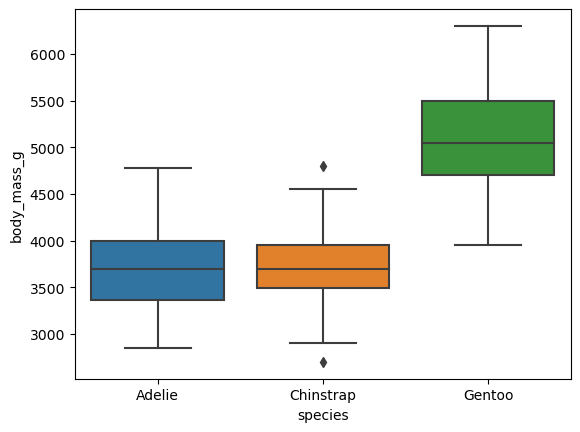

In [61]:
sns.boxplot(data=df,x='species',y='body_mass_g')

# Visualize the Tree

In [62]:
from sklearn.tree import plot_tree

[Text(0.5416666666666666, 0.9, 'x[2] <= 0.351\ngini = 0.626\nsamples = 233\nvalue = [106, 41, 86]'),
 Text(0.3333333333333333, 0.7, 'x[0] <= -0.104\ngini = 0.4\nsamples = 145\nvalue = [105, 40, 0]'),
 Text(0.16666666666666666, 0.5, 'x[0] <= -0.286\ngini = 0.056\nsamples = 105\nvalue = [102, 3, 0]'),
 Text(0.08333333333333333, 0.3, 'gini = 0.0\nsamples = 97\nvalue = [97, 0, 0]'),
 Text(0.25, 0.3, 'x[2] <= -0.812\ngini = 0.469\nsamples = 8\nvalue = [5, 3, 0]'),
 Text(0.16666666666666666, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 3, 0]'),
 Text(0.3333333333333333, 0.1, 'gini = 0.0\nsamples = 5\nvalue = [5, 0, 0]'),
 Text(0.5, 0.5, 'x[4] <= 0.33\ngini = 0.139\nsamples = 40\nvalue = [3, 37, 0]'),
 Text(0.4166666666666667, 0.3, 'gini = 0.0\nsamples = 3\nvalue = [3, 0, 0]'),
 Text(0.5833333333333334, 0.3, 'gini = 0.0\nsamples = 37\nvalue = [0, 37, 0]'),
 Text(0.75, 0.7, 'x[1] <= 0.262\ngini = 0.045\nsamples = 88\nvalue = [1, 1, 86]'),
 Text(0.6666666666666666, 0.5, 'gini = 0.0\nsamples = 86\

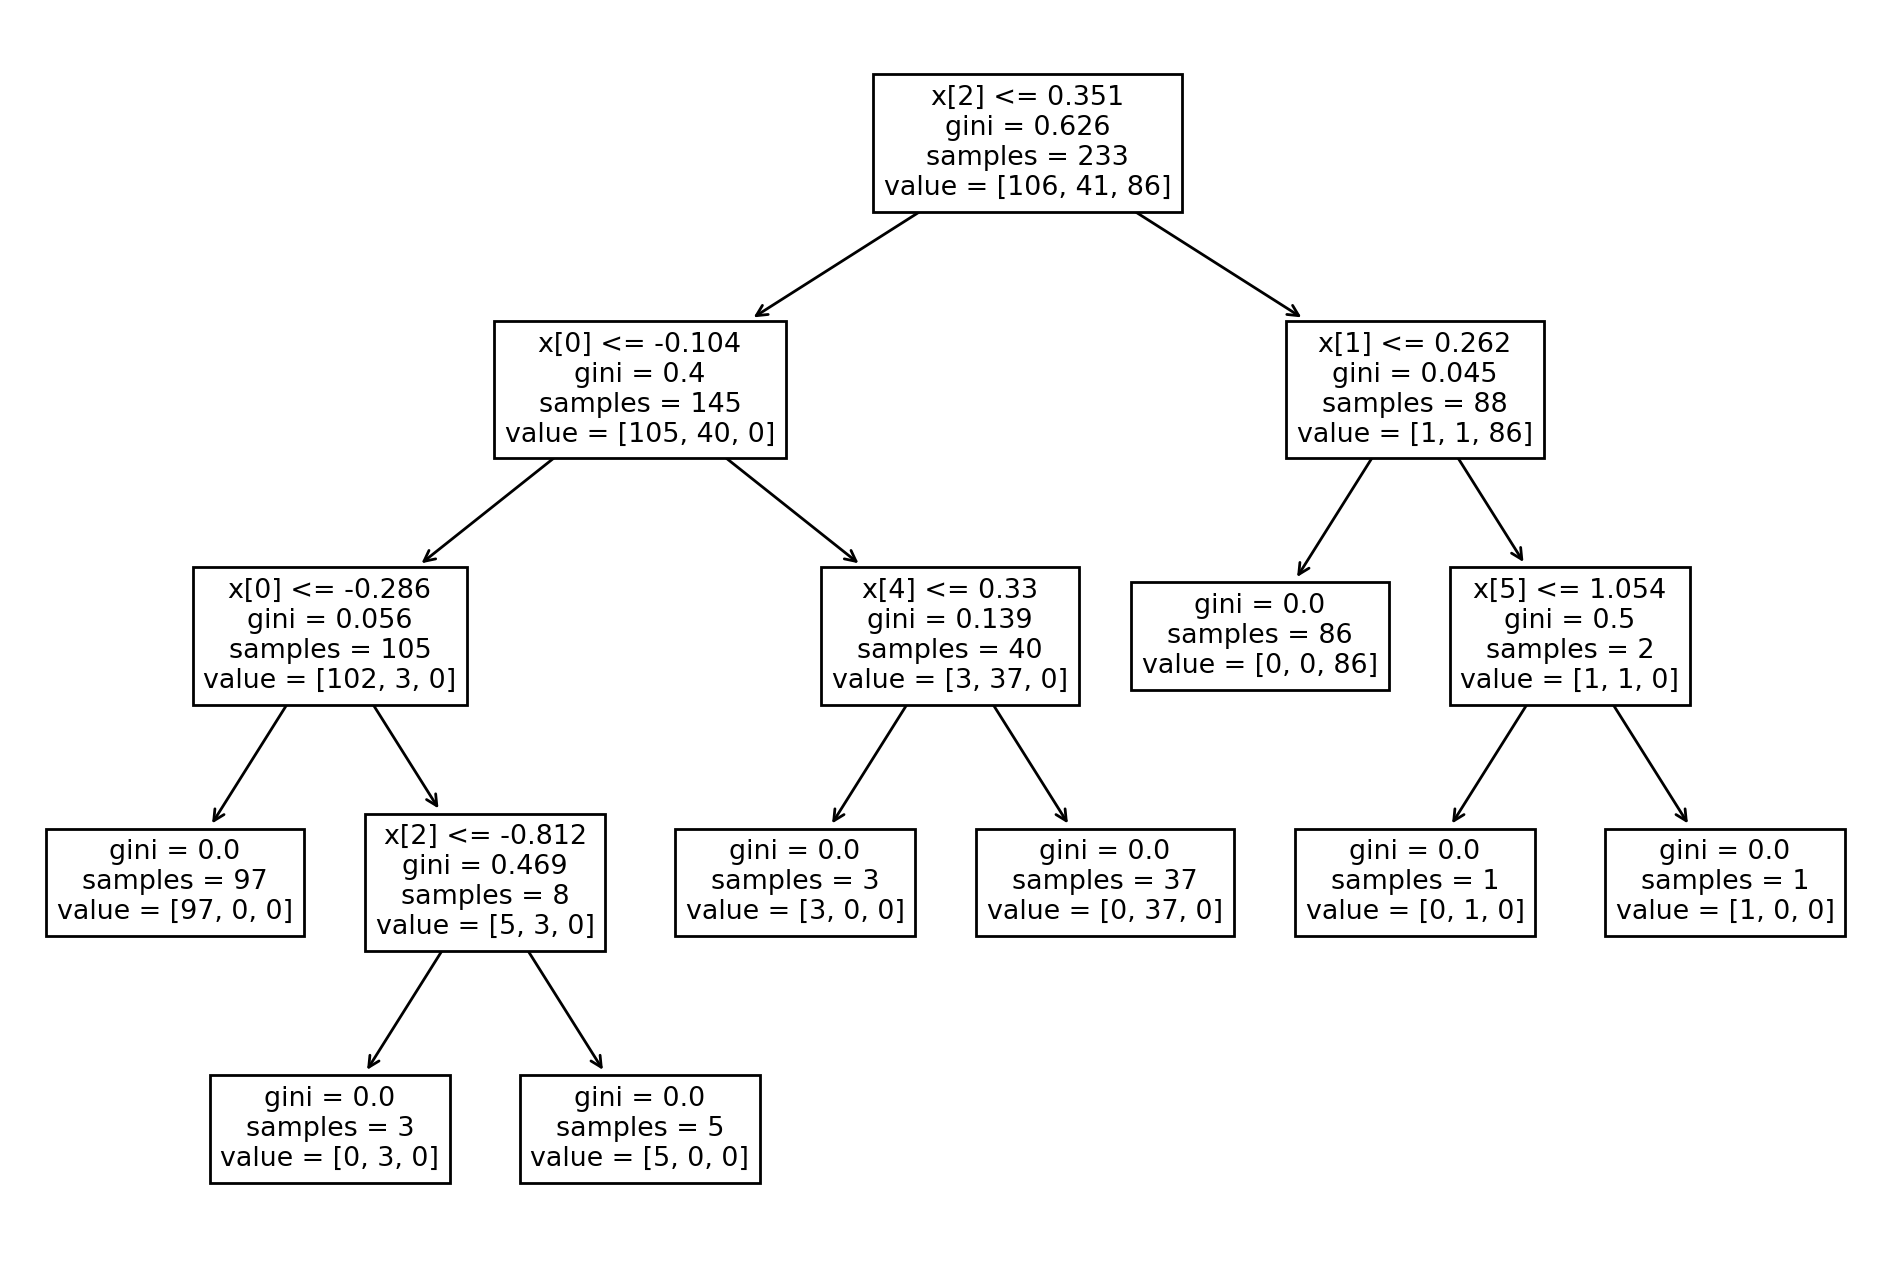

In [64]:
plt.figure(figsize=(12,8),dpi=200)
plot_tree(model)

[Text(0.5416666666666666, 0.9, 'flipper_length_mm <= 0.351\ngini = 0.626\nsamples = 233\nvalue = [106, 41, 86]'),
 Text(0.3333333333333333, 0.7, 'culmen_length_mm <= -0.104\ngini = 0.4\nsamples = 145\nvalue = [105, 40, 0]'),
 Text(0.16666666666666666, 0.5, 'culmen_length_mm <= -0.286\ngini = 0.056\nsamples = 105\nvalue = [102, 3, 0]'),
 Text(0.08333333333333333, 0.3, 'gini = 0.0\nsamples = 97\nvalue = [97, 0, 0]'),
 Text(0.25, 0.3, 'flipper_length_mm <= -0.812\ngini = 0.469\nsamples = 8\nvalue = [5, 3, 0]'),
 Text(0.16666666666666666, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 3, 0]'),
 Text(0.3333333333333333, 0.1, 'gini = 0.0\nsamples = 5\nvalue = [5, 0, 0]'),
 Text(0.5, 0.5, 'island_Dream <= 0.33\ngini = 0.139\nsamples = 40\nvalue = [3, 37, 0]'),
 Text(0.4166666666666667, 0.3, 'gini = 0.0\nsamples = 3\nvalue = [3, 0, 0]'),
 Text(0.5833333333333334, 0.3, 'gini = 0.0\nsamples = 37\nvalue = [0, 37, 0]'),
 Text(0.75, 0.7, 'culmen_depth_mm <= 0.262\ngini = 0.045\nsamples = 88\nvalue = [1

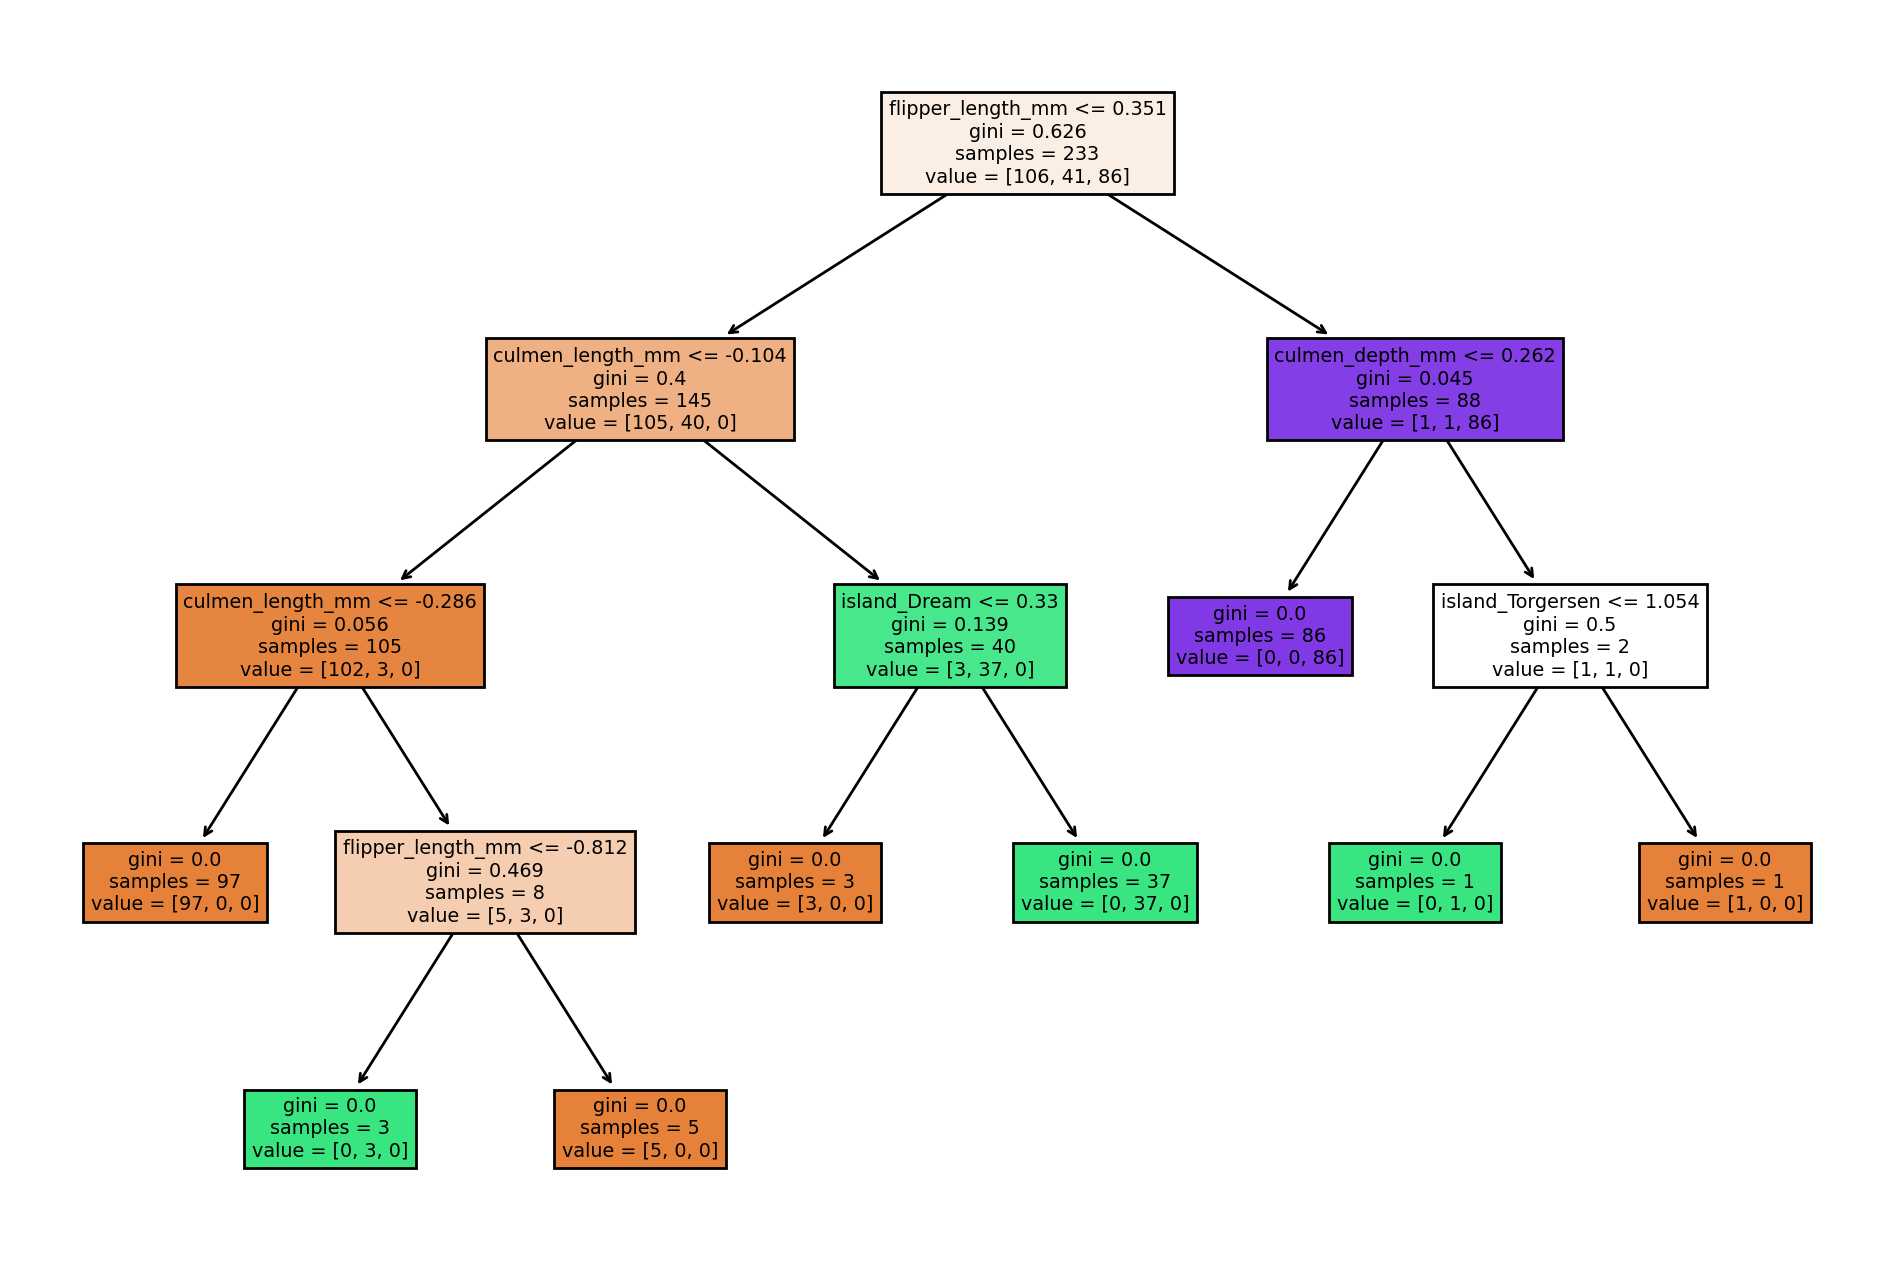

In [66]:
plt.figure(figsize=(12,8), dpi=200)
plot_tree(model,filled=True,feature_names=X.columns)